In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
def sigmoid(a) :
    return 1 / (1 + np.exp(-a))

def classification_rate(X, Y) :
    return np.mean(X == Y)

def cross_entropy(T, pY) :
    return -np.mean(T * np.log(pY) + (1 - T) * np.log(1 - pY))

def cross_entropy_2(T, Y) :
    E = 0
    for i in range(len(T)) :
        if T[i] == 1 :
            E -= np.log(Y[i])
        else :
            E -= np.log(1 - Y[i])
    return E

def forward(X, W, b) : 
    return sigmoid(X.dot(W) + b)

In [3]:
b = 0 #bias term
N = 4
D = 2

### Numpy matrix
Numpy matrices are strictly 2-dimensional, while numpy arrays (ndarrays) are N-dimensional. Matrix objects are a subclass of ndarray, so they inherit all the attributes and methods of ndarrays.

The main advantage of numpy matrices is that they provide a convenient notation for matrix multiplication: if a and b are matrices, then a*b is their matrix product.

In [33]:
X = np.array([[0, 0], 
             [0, 1],
             [1, 0],
             [1, 1]])

T = np.array([0, 1, 1, 0])
xy = np.array([X[:, 0] * X[:, 1]]).T
X_xy = np.concatenate((xy, X), axis = 1)

2.794611583703022
2.7612034672592474
2.7307893159244596
2.7025783451883907
2.676089370119276
2.6509783369451876
2.6269983442882174
2.603970841753326
2.5817651742850467
2.5602841974344397
2.539454231108374
2.519218075896471
2.4995301727480976
2.4803532535556663
2.4616560243276284
2.443411561343698
2.425596198573691
2.4081887531275825
2.3911699831264794
2.3745222053524966
2.358229022785791
2.3422751277989944
2.3266461575423567
2.3113285854395644
2.2963096377783474
2.2815772278491844
2.267119902460395
2.252926797283021
2.2389875985903336
2.22529250971676
2.2118322210803405
2.198597882967751
2.1855810805233156
2.172773810549086
2.1601684598361484
2.1477577848246963
2.1355348924432556
2.12349322201377
2.1116265281341238
2.0999288644669543
2.0883945683755734
2.0770182463562907
2.0657947602224827
2.0547192140001806
2.0437869414983068
2.032993494519299
2.0223346316779622
2.0118063077981856
2.0014046638586973
1.9911260174604382
1.9809668537893979
1.9709238170499896
1.9609937023451387
1.95117344

<IPython.core.display.Javascript object>


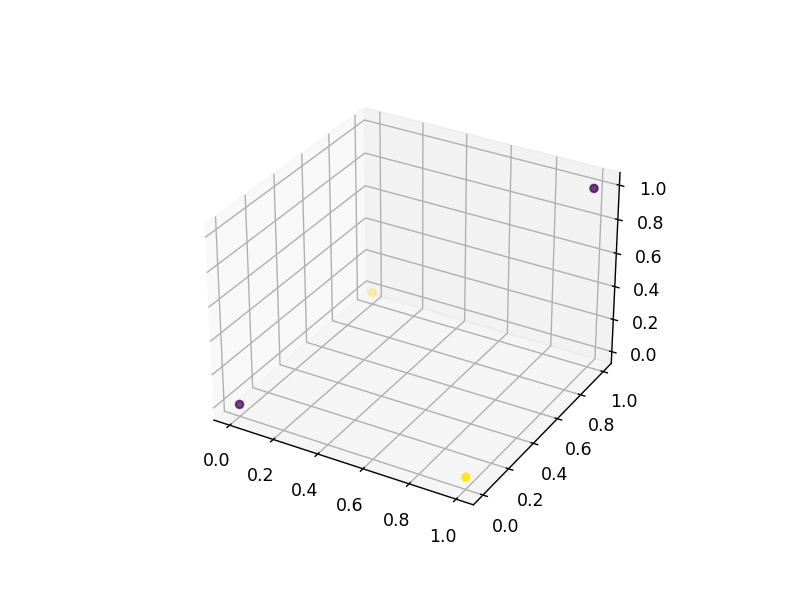

<IPython.core.display.Javascript object>


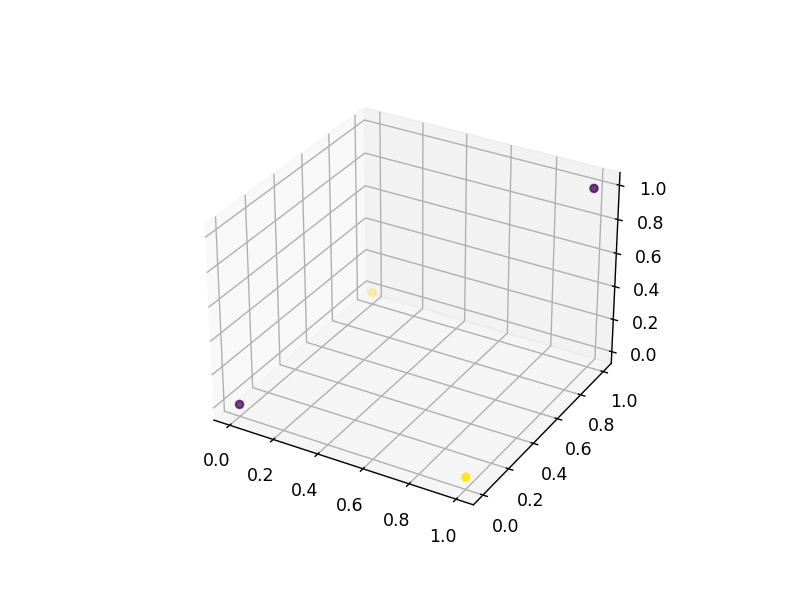

In [60]:
l1 = 0.001
epochs = 10000
learning_rate = 0.1

#randomly initalizing weights
w = np.random.randn((D + 1)) / np.sqrt(D + 1)
Y = forward(X_xy, w, b)

for i in range(epochs) :
    if i % 100 == 0 :
        e = cross_entropy_2(T, Y)
        print(e)
        
        w -= learning_rate * (X_xy.T.dot(Y - T) + l1 * np.sign(w))
        b -= learning_rate * (Y - T).sum()
        Y = forward(X_xy, w, b)
        
print('Final classification rate : ', classification_rate(T, np.round(Y)))
print('Final w : ', w)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_xy[:, 1], X_xy[:, 2], X_xy[:, 0], c = T)
plt.show()